Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Animation saved to Google Drive.


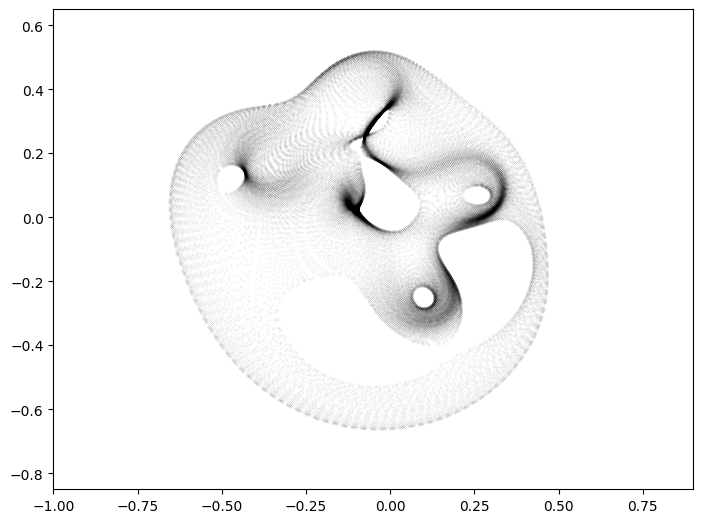

In [ ]:
#Habiendo escogido la trayectoria y la matriz, este programa genera una animación
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from google.colab import drive
drive.mount('/content/gdrive')

valor_inicial = 0


matrix = [[0.05753113+0.34877793j, 0.05982675+0.12976842j, 0.18205039+0.49423044j, 0.02183252+0.15393076j, 0.06992223+0.11073228j, 0.01988349+0.08207641j, 0.09888022+0.32943484j],
 [0.00411181+0.10000099j, 0.00173423+0.14432786j, 0.18217809+0.02870013j, 0.19002703+0.11119971j, 0.02280097+0.12723661j, 0.03731876+0.41262693j, 0.09241118+0.08471449j],
 [0.11267956+0.25645649j, 0.15568663+0.14941783j, 0.17228781+0.38404580j, 0.05811657+0.14278189j, 0.11773352+0.44536188j, 0.08815113+0.39109373j, 0.10887543+0.44577058j],
 [0.19411853+0.34569211j, 0.09067709+0.07654895j, 0.14632825+0.30255923j, 0.10411671+0.25938954j, 0.09859512+0.31599243j, 0.0703206 +0.09727841j, 0.18918675+0.28516666j],
 [0.03318348+0.04191032j, 0.18584548+0.46966662j, 0.18169308+0.05937040j, 0.18798046+0.42693063j, 0.10211214+0.45650185j, 0.15210675+0.44294362j, 0.11188335+0.21084502j],
 [0.07424220+0.24537125j, 0.03746951+0.04944135j, 0.10585662+0.32915007j, 0.18634462+0.23619086j, 0.14503395+0.21107000j, 0.00989608+0.35341304j, 0.16219158+0.3503677j ],
 [0.08047481+0.45989309j, 0.04877858+0.08181318j, 0.08815810+0.26862456j, 0.03275289+0.36789591j, 0.01843772+0.32956757j, 0.03164022+0.07641308j, 0.14659927+0.42311729j]]

fig, ax = plt.subplots()
ax.set_xlim([-1, 0.9])
ax.set_ylim([-0.85, 0.65])
plt.subplots_adjust(top=1, bottom=0, left=0, right=1)
sc = ax.scatter([], [], s=0.001)


def generate_plot(entrada_movil):

 n = 10000
 eigenvalues0 = np.empty(shape=(0))
 angle = 0

 for i in range (1, n):

  t = 0.5*(np.cos(angle*1.41+2.7)) + 0.5*(1j * np.sin(angle*1.41+2.7))
  s = 0.5*np.cos(angle) + 1j * 0.5 * np.sin(angle)

  matrix [6][1] = t
  matrix [5][5] = s
  matrix [1][3] = entrada_movil

  eigenvalues = np.linalg.eigvals(matrix)

  angle += 0.0575

  eigenvalues0 = np.concatenate((eigenvalues0, eigenvalues), axis=0)

 real_part = np.real(eigenvalues0)
 imaginary_part = np.imag(eigenvalues0)

 plt.scatter(real_part, imaginary_part,label = '', color='black', s=0.00094)
 plt.grid(False)



def animate(frame):
 ax.clear()
 ax.set_xlim([-1, 0.9])
 ax.set_ylim([-0.85, 0.65])
 r = valor_inicial + np.cos(frame*0.01) + np.sin(frame*0.01)*1j
 generate_plot(r)

animation = FuncAnimation(fig, animate, frames=628, blit=False)

#HTML(animation.to_jshtml())

animation.save('/content/animation.mp4', writer='ffmpeg', fps=36)

!mv /content/animation.mp4 /content/gdrive/My\ Drive/

print("Animation saved to Google Drive.")
